# Partitioning around Medoids in Python

In [16]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
# Calculate pairwise distances
metric = 'manhattan'
dissimilarity_matrix = pairwise_distances(iris_df, metric='manhattan')

# Perform PAM clustering using KMedoids from sklearn_extra
pam = KMedoids(init='random', method='pam', metric='precomputed', n_clusters=3,
         random_state=2024)
pam.fit(dissimilarity_matrix)

# Extract medoids and clustering results
medoids = pam.cluster_centers_
clustering_results = pam.labels_
clustering_results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

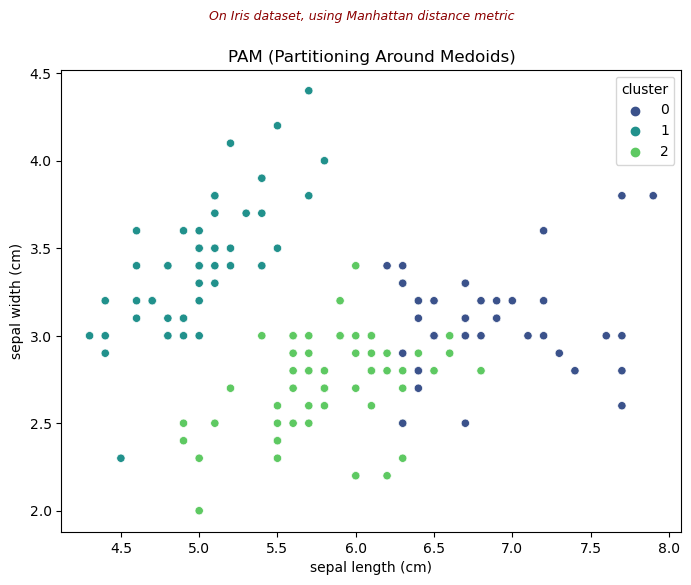

In [12]:
# Add clustering results to the original dataframe
iris_df['cluster'] = pd.Categorical(clustering_results)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['cluster'], palette="viridis")
plt.title('PAM (Partitioning Around Medoids)')
plt.suptitle('On Iris dataset, using Manhattan distance metric', fontsize=9, style='italic', color='darkred')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()